In [80]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
import math

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [7]:
from sklearn import metrics

In [8]:
import statsmodels.api as sm

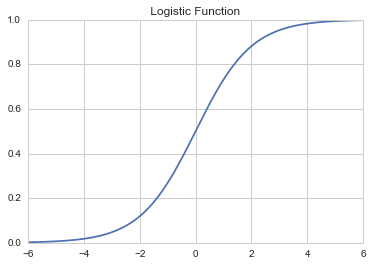

In [12]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

In [14]:
df=sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [17]:
def affair_check(x):
    if x!= 0:
        return 1
    else:
        return 0

In [18]:
df['Had_Affair']=df['affairs'].apply(affair_check)

In [19]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [20]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


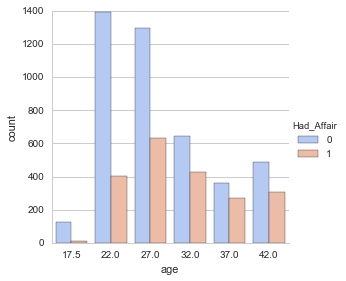

In [27]:
sns.factorplot('age',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

In [28]:
occ_dummies=pd.get_dummies(df['occupation'])

In [30]:
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [32]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [33]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [36]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [56]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)


In [57]:
X=pd.concat([X,dummies],axis=1)

In [58]:
Y=df.Had_Affair

In [59]:
X=X.drop(['occ1'],axis=1)

In [61]:
X=X.drop(['hocc1'],axis=1)

In [68]:
X=X.drop(['affairs'],axis=1)

In [69]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [70]:
Y=np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
log_model=LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.72573044297832234

In [72]:
Y.mean()

0.32249450204209867

In [91]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

TypeError: data argument can't be an iterator

In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [93]:
log_model2 = LogisticRegression()

In [94]:
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
class_predict = log_model2.predict(X_test)

In [97]:
print(metrics.accuracy_score(class_predict,Y_test))

0.716708542714
